# EDA of Claim Dataaset
# 02_EDA_Claim

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 24/09/2025 | Adrienne | Created   | Created to do EDA for Claim Dataset | 
| 27/09/2025 | Adrienne | Update | Added code from Martin |

# Content

* [Introduction](#introduction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import json_lines
import seaborn as sns

In [2]:
# readin clean datafiles
path = "../data/clean/"
#claim_df =  pd.read_pickle(path + 'claim.pkl')
#claim_df = pd.read_pickle(path + 'claim_sample.pkl')
claim_df = pd.read_pickle(path + 'claim_mini_sample.pkl')
#claim_response_df =  pd.read_pickle(path + 'claim_response.pkl')

In [3]:
# readin secondary datasets
drg_df = pd.read_pickle(path + 'drg.pkl') 
hcpcs_df = pd.read_pickle(path + 'hcpcs.pkl')
icd10_df = pd.read_pickle(path + 'icd10.pkl')

### Look at Code Lists

Findings

- ICD10 codes are in almost all claims
- ~56% of icd10 lists are length 1 or 2 in length
- HCPCS list that we currently have is just the HCPCS II level codes.  Need to get level I and combine

ICD10

In [4]:
print(f"Number of non-NaN ICD10 entries: {claim_df.shape[0] - claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0).sum()} out of {len(claim_df)}")

Number of non-NaN ICD10 entries: 178570 out of 178761


In [5]:
non_na_icd10 = claim_df[~claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0)]
non_na_icd10['ls_len'] = non_na_icd10['diagnosis_ls'].str.len()
non_na_icd10['first_icd10'] = non_na_icd10['diagnosis_ls'].str[0]

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_12343/1123325870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_icd10['ls_len'] = non_na_icd10['diagnosis_ls'].str.len()
/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_12343/1123325870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_icd10['first_icd10'] = non_na_icd10['diagnosis_ls'].str[0]


In [67]:
na_icd10 = claim_df[claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0)]

<Axes: xlabel='count', ylabel='ls_len'>

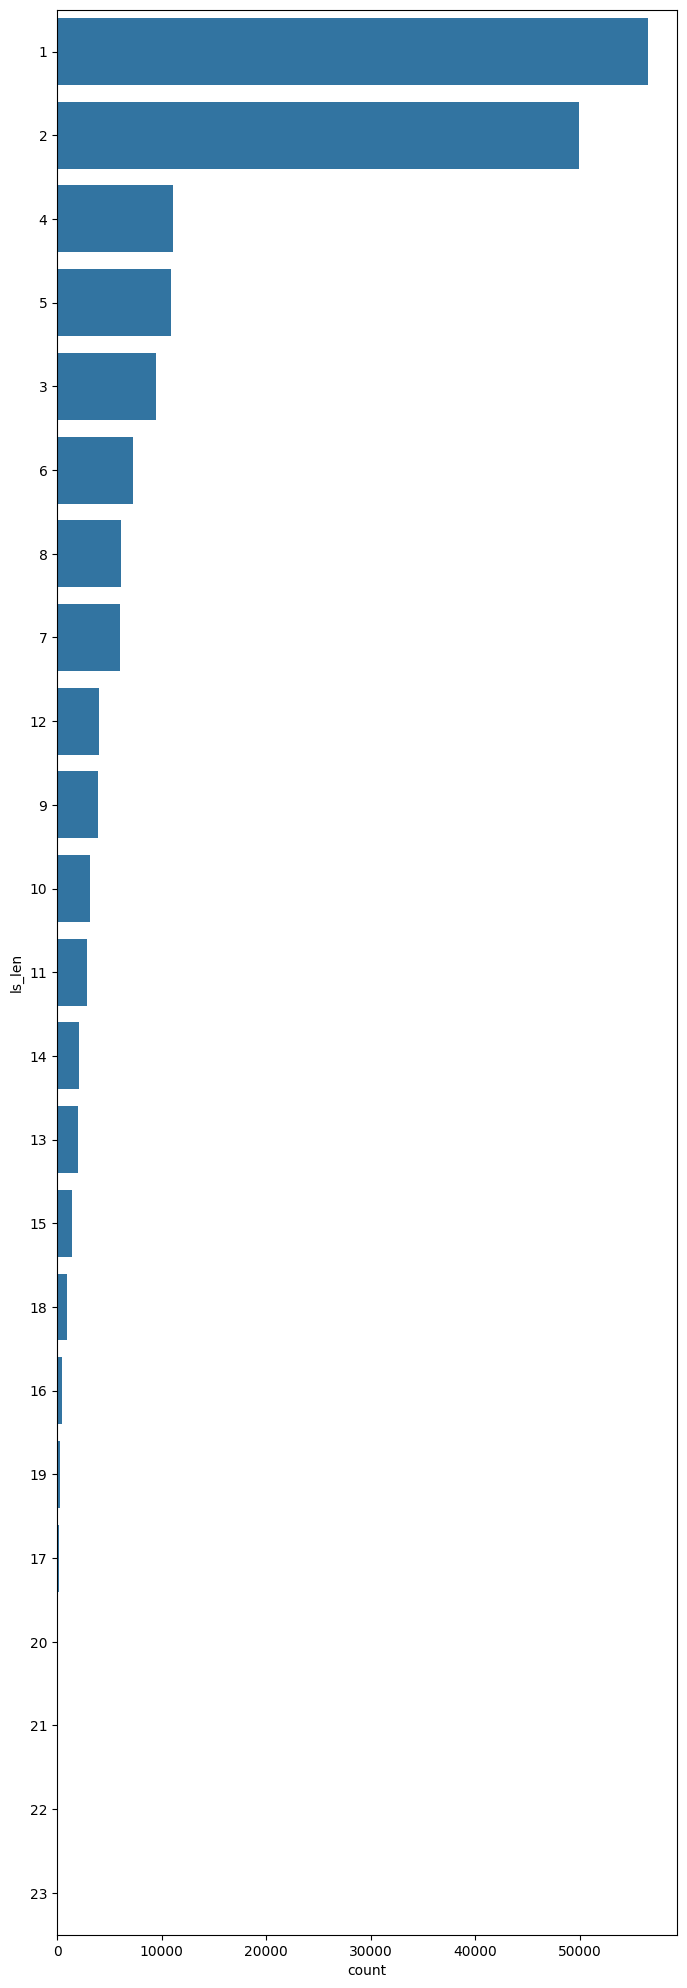

In [68]:
fig, ax = plt.subplots(figsize=(8, 25))
sns.countplot(y='ls_len', data=non_na_icd10, order=non_na_icd10['ls_len'].value_counts().index)

In [27]:
print(len(non_na_icd10[non_na_icd10['ls_len']== 1]) + len(non_na_icd10[non_na_icd10['ls_len']== 2]) )

106400


In [25]:
print(len(non_na_icd10[non_na_icd10['ls_len']== 11]))
print(len(non_na_icd10[non_na_icd10['ls_len']== 19]))
print(len(non_na_icd10[non_na_icd10['ls_len']== 21]))
print(len(non_na_icd10[non_na_icd10['ls_len']== 22]))
print(len(non_na_icd10[non_na_icd10['ls_len']== 23]))

2866
303
29
3
1


HCPCS

In [72]:
print(f"Number of non-NaN HCPCS entries: {claim_df.shape[0] - claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0).sum()} out of {len(claim_df)}")

Number of non-NaN HCPCS entries: 93842 out of 178761


In [17]:
non_na_hcpcs = claim_df[~claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0)]
non_na_hcpcs['ls_len'] = non_na_hcpcs['hcpcs_ls'].str.len()
non_na_hcpcs['first_hcpcs'] = non_na_hcpcs['hcpcs_ls'].str[0]

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_32342/3941366260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['ls_len'] = non_na_hcpcs['hcpcs_ls'].str.len()
/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_32342/3941366260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['first_hcpcs'] = non_na_hcpcs['hcpcs_ls'].str[0]


<Axes: xlabel='count', ylabel='ls_len'>

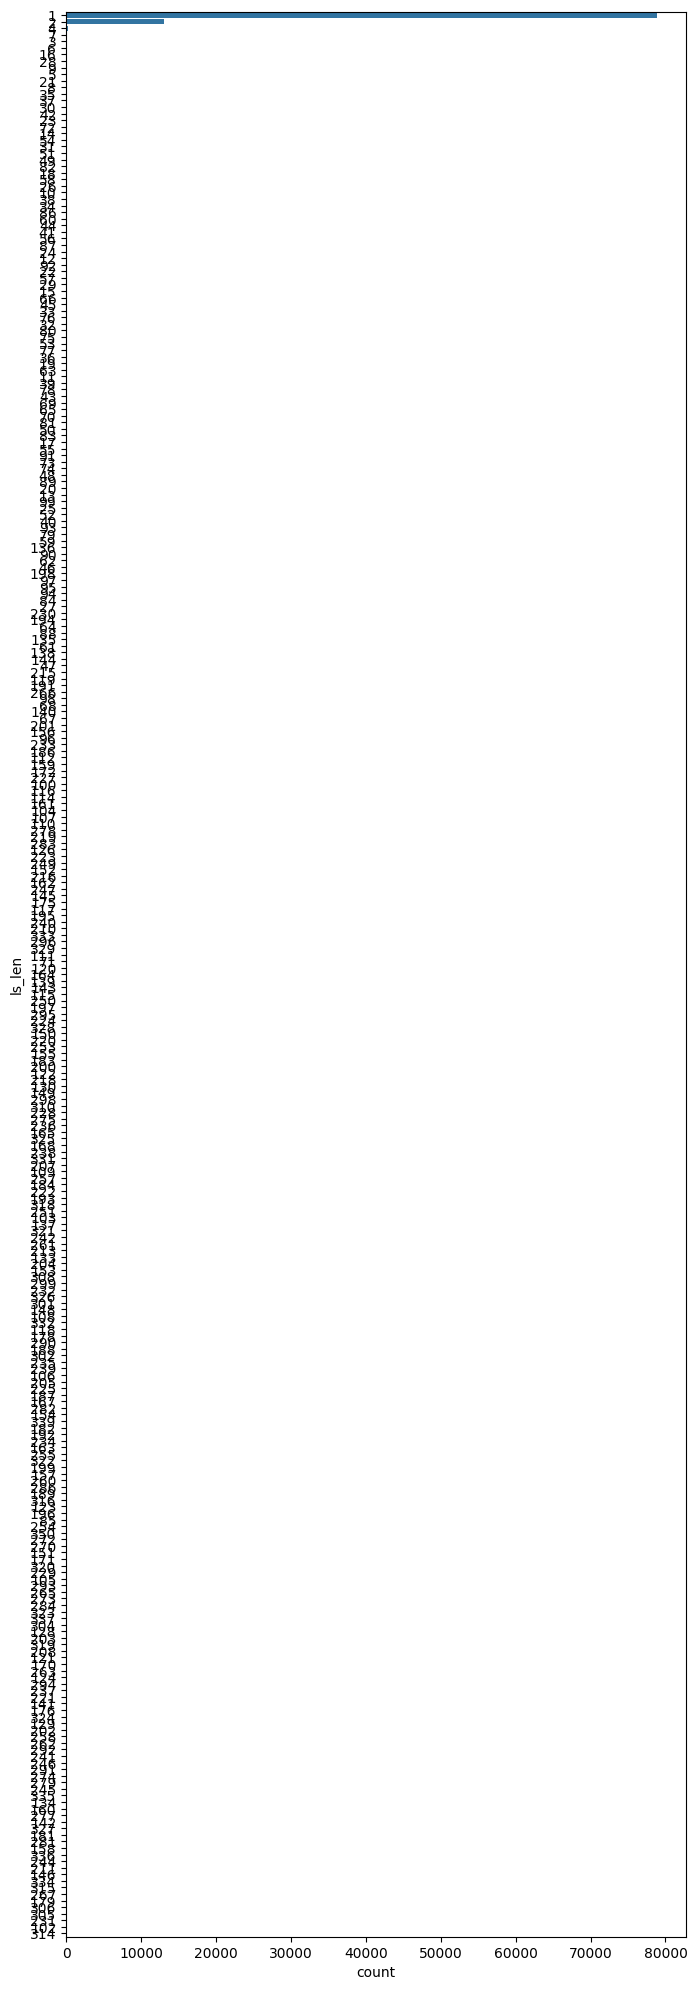

In [74]:
fig, ax = plt.subplots(figsize=(8, 25))
sns.countplot(y='ls_len', data=non_na_hcpcs, order=non_na_hcpcs['ls_len'].value_counts().index)

In [75]:
print(f'min length: {non_na_hcpcs['ls_len'].min()}')
print(f'max length: {non_na_hcpcs['ls_len'].max()}')

min length: 1
max length: 350


### Look at Percentage of Values

Findings

- ICD10 list is not complete.  About a third of codes aren't merging with a description
- 92.5% of all claims have no HCPCS in procedure list.  The ones that are in there do not merge with a description
- DRG code list is complete enough.  There are some that did not merge with a description but can look into later
- 77% of claims are institutional which are inpatient and outpatient services provided by a healthcare facility like a hospital
- Still need to research bill type
- There are hpccs codes that are 11 in length that make up 12.175262% of the data which are actually national drug codes (NDC).  There are codes that are 3 in length that make up 0.155099% of the data all with value I3C.  Not sure what that value means

ICD10

In [76]:
# Percentage breakdown
vals = non_na_icd10['diagnosis_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'ICD10_breakdown': vals
}).head(20)

,ICD10_breakdown
diagnosis_ls,
[E669],5.254522
[D649],3.100185
[E785],3.003864
[J329],2.281458
[O039],1.624573
[E781],1.458252
[R739],1.448172
[I10],1.374811
[P292],1.240970


In [6]:
# Percentage breakdown
vals = non_na_icd10['first_icd10'].value_counts(normalize=True) * 100
icd10_vals = vals.to_frame().reset_index()
df = pd.merge(icd10_vals, icd10_df[['CODE', 'SHORT DESCRIPTION']], how = 'left',left_on='first_icd10', right_on= 'CODE') 
df[['first_icd10', 'SHORT DESCRIPTION', 'proportion']].head(20)

,first_icd10,SHORT DESCRIPTION,proportion
0,E669,"Obesity, unspecified",15.547964
1,D649,"Anemia, unspecified",8.898471
2,J329,"Chronic sinusitis, unspecified",7.197738
3,E785,"Hyperlipidemia, unspecified",6.821975
4,E781,Pure hyperglyceridemia,5.686845
5,O039,Complete or unsp spontaneous abortion without ...,4.783558
6,R739,"Hyperglycemia, unspecified",4.612757
7,K37,Unspecified appendicitis,3.487708
8,I10,Essential (primary) hypertension,3.369547
9,P292,Neonatal hypertension,3.267626


In [11]:
df[['first_icd10', 'SHORT DESCRIPTION', 'proportion']].tail(50)

,first_icd10,SHORT DESCRIPTION,proportion
133,J45909,"Unspecified asthma, uncomplicated",0.01624
134,S303XX,NaN,0.01624
135,J208,Acute bronchitis due to other specified organisms,0.01624
136,R05,Cough,0.01568
137,J069,"Acute upper respiratory infection, unspecified",0.01512
138,S81009,NaN,0.01456
139,S72009,NaN,0.01400
140,K625,Hemorrhage of anus and rectum,0.01344
141,J3089,Other allergic rhinitis,0.01176
142,Z3480,NaN,0.01176


In [9]:
print(f"number of icd10 codes that does not merge with a description: {len(df[ df['SHORT DESCRIPTION'].isnull() ] )} out of {len(df)}")

number of icd10 codes that does not merge with a description: 40 out of 183


HCPCS

In [78]:
# Percentage breakdown
vals = non_na_hcpcs['hcpcs_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'hcpcs_breakdown': vals
}).head(10)

,hcpcs_breakdown
hcpcs_ls,
[99241],51.180708
[G0444],19.458238
"[99241, 00777310502]",8.125360
[99221],6.286098
"[G0444, 00777310502]",2.379532
"[99221, 00777310502]",0.964387
"[G0444, G9573]",0.667079
"[G0444, G9572]",0.648963
[S8075],0.578632


In [14]:
# Percentage breakdown
vals = non_na_hcpcs['first_hcpcs'].value_counts(normalize=True) * 100
hcpcs_vals = vals.to_frame().reset_index()
df = pd.merge(hcpcs_vals, hcpcs_df, how = 'left',left_on='first_hcpcs', right_on= 'Code') 
df[['first_hcpcs', 'Description', 'proportion']].head(20)

,first_hcpcs,Description,proportion
0,99241,NaN,59.306068
1,G0444,"Annual depression screening, 5 to 15 minutes",23.320049
2,99221,NaN,7.250485
3,G0402,Initial preventive physical examination; face-...,1.826474
4,S8075,NaN,0.668144
5,G8111,NaN,0.586092
6,G0151,Services performed by a qualified physical the...,0.573304
7,S9131,"Physical therapy; in the home, per diem",0.561582
8,G0157,Services performed by a qualified physical the...,0.556254
9,G0299,Direct skilled nursing services of a registere...,0.529614


In [15]:
print(f"number of hcpcs codes that does not merge with a description: {len(df[ df['Description'].isnull() ] )} out of {len(df)}")


number of hcpcs codes that does not merge with a description: 7 out of 41


In [72]:
non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))
non_na_hcpcs.head()

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_32342/3782310557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))


,billablePeriod_end,billablePeriod_start,contained_0_birthDate,contained_0_gender,contained_0_id,contained_0_identifier_0_type_coding_0_code,contained_0_identifier_0_type_coding_0_display,contained_0_identifier_0_value,contained_0_name_0_family,contained_0_name_0_given,...,claim_type,location_of_bill,diagnosis_ls,hcpcs_ls,procedure_ls,ls_len,first_hcpcs,len_claim,year,length_counts
23118,2019-05-17,2019-05-17,1948-06-14,female,patient,MC,Patient's Medicare Number,1S00E00AD09,Ward668,"[""Oralia106""]",...,institutional,2,"[K011, G43719, R52, E669, E785, K3520, K37, Z9...","[99241, 00777310502]",[],2,99241,9,2019,11
125808,2019-07-07,2019-07-07,1947-05-04,female,patient,MC,Patient's Medicare Number,1S00E00AG56,Rice937,"[""Filomena21""]",...,institutional,2,"[E669, J329, E034, D649, E785, B349]","[99241, 00777310502]",[],2,99241,9,2019,11
27404,2019-07-03,2019-07-03,1948-01-01,male,patient,MC,Patient's Medicare Number,1S00E00MP51,Hilpert278,"[""Errol226""]",...,institutional,4,"[C189, K621, D649, M810, I639, P292, K635]",[G0152],[],1,G0152,9,2019,5
46317,2012-03-01,2012-03-01,1952-04-16,female,patient,MC,Patient's Medicare Number,1S00E00JD02,Koepp521,"[""Jacquetta1""]",...,institutional,2,"[R739, E781, E8881, D649, M179, J329, E669, E119]",[99241],[],1,99241,9,2012,5
24738,2012-09-19,2012-09-19,1947-08-12,female,patient,MC,Patient's Medicare Number,1S00E00HF72,Carter549,"[""Darlene91""]",...,institutional,4,[O039],[Q5001],[],1,Q5001,9,2012,5


In [73]:
non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))
vals = non_na_hcpcs['length_counts'].value_counts(normalize=True) * 100
pd.DataFrame({
  'length_breakdown': vals
}).head(22)

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_32342/3623794473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['length_counts'] = non_na_hcpcs['hcpcs_ls'].apply(lambda x: max([len(code) for code in x]))


,length_breakdown
length_counts,
5,87.669639
11,12.175262
3,0.155099


In [74]:
non_na_hcpcs[ non_na_hcpcs['length_counts'] ==3]

,billablePeriod_end,billablePeriod_start,contained_0_birthDate,contained_0_gender,contained_0_id,contained_0_identifier_0_type_coding_0_code,contained_0_identifier_0_type_coding_0_display,contained_0_identifier_0_value,contained_0_name_0_family,contained_0_name_0_given,...,claim_type,location_of_bill,diagnosis_ls,hcpcs_ls,procedure_ls,ls_len,first_hcpcs,len_claim,year,length_counts
146745,2018-10-28,2018-10-28,1955-01-08,male,patient,MC,Patient's Medicare Number,1S00E00JX24,Cummings51,"[""Wade235""]",...,institutional,2,"[P292, I501, I50810, I50813]",[I3C],[B245ZZZ],1,I3C,9,2018,3
62322,2016-12-22,2016-12-22,1953-02-03,male,patient,MC,Patient's Medicare Number,1S00E00HU27,Mayert710,"[""Brant303""]",...,institutional,2,"[E669, R52, P292, P2981, Z8679, D649, I501, I509]",[I3C],[B244ZZZ],1,I3C,9,2016,3
34591,2017-04-18,2017-04-18,1951-03-06,female,patient,MC,Patient's Medicare Number,1S00E00GT02,Bergstrom287,"[""Brooke250""]",...,institutional,2,"[O039, I639, J329, D649]",[I3C],[B244ZZZ],1,I3C,9,2017,3
6250,2018-01-11,2018-01-11,1947-08-07,male,patient,MC,Patient's Medicare Number,1S00E00KG44,Heller342,"[""Isaiah615""]",...,institutional,2,"[E785, R739, E781, E8881, E119, D649, I10, E11...",[I3C],[B24DZZZ],1,I3C,9,2018,3
117177,2019-12-31,2019-12-31,1952-11-09,female,patient,MC,Patient's Medicare Number,1S00E00HP11,Flatley871,"[""Kay203""]",...,institutional,2,"[I509, P2981, Z8679, E669, I50810]",[I3C],[B244ZZZ],1,I3C,9,2019,3
151260,2021-05-29,2021-05-29,1950-07-22,male,patient,MC,Patient's Medicare Number,1S00E00HQ72,Gibson10,"[""Forrest301""]",...,institutional,2,"[I639, J329, E785, E669]",[I3C],[B245ZZZ],1,I3C,9,2021,3
5997,2012-03-16,2012-03-16,1955-07-22,male,patient,MC,Patient's Medicare Number,1S00E00GY07,Kerluke267,"[""Major265""]",...,institutional,2,"[I639, I2510, D649, E669, J189]",[I3C],[B246ZZZ],1,I3C,9,2012,3
158046,2020-02-12,2020-02-12,1950-01-11,female,patient,MC,Patient's Medicare Number,1S00E00MJ01,Lebsack687,"[""Arlinda565""]",...,institutional,2,"[K37, Z9049, E669, I639, E785]",[I3C],[B244ZZZ],1,I3C,9,2020,3


Procedure

In [105]:
# Percentage breakdown
vals = claim_df['procedure_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'procedure_breakdown': vals
}).head(10)

,procedure_breakdown
procedure_ls,
[],92.514027
[BW03ZZZ],1.111540
[0U2DXHZ],0.828480
[BH00ZZZ],0.405010
[BH01ZZZ],0.396060
[BH02ZZZ],0.378159
[09JY4ZZ],0.301520
[B244ZZZ],0.196352
[B24DZZZ],0.178451


In [110]:
claim_df['proc_ls_len'] = claim_df['procedure_ls'].str.len()
print(f'min length: {claim_df['proc_ls_len'].min()}')
print(f'max length: {claim_df['proc_ls_len'].max()}')

min length: 0
max length: 25


DRG

In [22]:
# Percentage breakdown
claim_df['drg_pad'] = claim_df['drg_code'].apply( lambda x : '{0:0>3}'.format(x)) 
vals = claim_df['drg_pad'].value_counts(normalize=True) * 100
drg_vals = vals.to_frame().reset_index()
df = pd.merge(drg_vals, drg_df, how = 'left',left_on='drg_pad', right_on= 'DRG') 
df[['drg_pad', 'DRG_description', 'proportion']].head(20)

,drg_pad,DRG_description,proportion
0,nan,NaN,95.210924
1,642,Inborn and other disorders of metabolism,0.301520
2,003,ECMO o r tracheostomy with MV >96 hours or PDX...,0.298723
3,001,Heart transplant or implant of heart assist sy...,0.259564
4,598,Malignant breast disorders with CC,0.228238
5,599,Malignant breast disorders without CC/MCC,0.226559
6,597,Malignant breast disorders with MCC,0.217609
7,582,Mastectomy for malignancy with CC/MCC,0.205861
8,583,Mastectomy for malignancy without CC/MCC,0.204743
9,641,"Miscellaneous disorders of nutrition, metaboli...",0.181807


In [23]:
print(f"number of drg codes that does not merge with a description: {len(df[ df['DRG_description'].isnull() ] )} out of {len(df)}")


number of drg codes that does not merge with a description: 3 out of 176


In [24]:
df[ df['DRG_description'].isnull() ] 

,drg_pad,proportion,DRG,MDC,DRG_description,MDC_description
0,nan,95.210924,NaN,NaN,NaN,NaN
43,019,0.021257,NaN,NaN,NaN,NaN
169,522,0.000559,NaN,NaN,NaN,NaN


Type of Bill

In [82]:
# Percentage breakdown
vals = claim_df['type_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'bill_type_breakdown': vals
}).head(10)

,bill_type_breakdown
type_of_bill,
1,95.570552
B,4.429448


Claim Type

In [83]:
# Percentage breakdown
vals = claim_df['claim_type'].value_counts(normalize=True) * 100
pd.DataFrame({
  'claim_type_breakdown': vals
}).head(10)

,claim_type_breakdown
claim_type,
institutional,77.177349
professional,22.822651


Location of Bill

In [84]:
# Percentage breakdown
vals = claim_df['location_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'location_of_bill_breakdown': vals
}).head(10)

,location_of_bill_breakdown
location_of_bill,
2,91.014982
4,6.957663
3,1.319194
9,0.708161


In [85]:
na_hcpcs = claim_df[claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0)]
vals = na_hcpcs['location_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'location_of_bill_breakdown': vals
}).head(10)

,location_of_bill_breakdown
location_of_bill,
2,90.577728
4,7.280706
3,1.399898
9,0.741668


Billable Period Start

In [68]:
# look at year of billable period
non_na_hcpcs['year'] = non_na_hcpcs['billablePeriod_start'].apply(lambda x: x[:4])
vals = non_na_hcpcs['year'].value_counts(normalize=True) * 100
pd.DataFrame({
  'year_breakdown': vals
}).head(30)

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_32342/1266437002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['year'] = non_na_hcpcs['billablePeriod_start'].apply(lambda x: x[:4])


,year_breakdown
year,
2021,15.725806
2014,14.112903
2020,10.302419
2019,10.262097
2018,9.193548
2017,9.193548
2016,8.548387
2013,7.862903
2015,7.661290


### Look at Patient and Number of Claims

Findings

All Claims:
- most common patient has 2550 claims
- least common has one claim
- there are 410 patients with 20 or less claims

Claims with HCPCS codes:
- most common patient has 1342
- there are 2419 with 50 claims or less
- for whatever reason there are multiple patients per patient medicare number.  This is resolved by dropping unique_claim_IDs that are not 9 in length as it appears the number indicates garbage data

In [131]:
# Percentage breakdown
vals = claim_df['patient_medicare_number'].value_counts(normalize=True) * 100
pd.DataFrame({
  'med_num_breakdown': vals
}).head(22)

,med_num_breakdown
patient_medicare_number,
1S00E00GT33,1.426486
1S00E00KH30,1.198248
1S00E00GU73,1.164684
1S00E00GJ99,1.089723
1S00E00HT76,0.586258
1S00E00GW62,0.476055
1S00E00JN81,0.312708
1S00E00AA46,0.304876
1S00E00AF73,0.298723


In [124]:
print(f"most common patient: { len(claim_df[ claim_df['patient_medicare_number'] == '1S00E00GT33'])} claims")
print(f"least common patient: { len(claim_df[ claim_df['patient_medicare_number'] == '1S00E00HG24'])} claims")
vals = claim_df['patient_medicare_number'].value_counts()
val_df = pd.DataFrame({
  'med_num_breakdown': vals
})
print(f"number of patients with 20 claims or less: {len(val_df[ val_df['med_num_breakdown'] < 20])}")

most common patient: 2550 claims
least common patient: 1 claims
number of patients with 20 claims or less: 410


In [130]:
# subset of data that have hcpcs
print(f"number of claims with hcpcs: {len(non_na_hcpcs)}")
print(f"most common patient: { len(non_na_hcpcs[ non_na_hcpcs['patient_medicare_number'] == '1S00E00GT33'])} claims")
print(f"least common patient: { len(non_na_hcpcs[ non_na_hcpcs['patient_medicare_number'] == '1S00E00HG24'])} claims")
vals = non_na_hcpcs['patient_medicare_number'].value_counts()
val_df = pd.DataFrame({
  'med_num_breakdown': vals
})
print(f"number of patients with 50 claims or less: {len(val_df[ val_df['med_num_breakdown'] < 50])}")

number of claims with hcpcs: 93842
most common patient: 1342 claims
least common patient: 0 claims
number of patients with 50 claims or less: 2419


Examine patient birthdate

In [11]:
# unique brithdate by patient medicare number
grp_ser = claim_df.groupby('patient_medicare_number')['contained_0_birthDate'].apply(list)
grp_df = pd.DataFrame({
  'num_birthdate': grp_ser
})
grp_df['ls'] = grp_df['num_birthdate'].apply(lambda x: [code for code in x if pd.notnull(code) ])
grp_df['num_bday'] = grp_df['num_birthdate'].apply(len)
#grp_df = pd.DataFrame( {'location_of_bill_ls': grp_ser})
vals = grp_df['num_bday'].value_counts(normalize=True) * 100
pd.DataFrame({
  'num_breakdown': vals
}).head(22)

,num_breakdown
num_bday,
1,24.071756
2,21.652065
3,15.102211
4,10.304547
5,7.425949
6,5.381727
7,3.420943
8,2.836879
9,2.377972


Unique Claim ID

In [81]:
claim_df['len_claim'] = claim_df['unique_claim_ID'].str.len()
vals = claim_df['len_claim'].value_counts(normalize=True) * 100
print('original unique_claim_ID lengths')
pd.DataFrame({
  'len_claim': vals
}).head(30)

original unique_claim_ID lengths


,len_claim
len_claim,
9,89.81
19,5.66
14,4.53


In [82]:
non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()
vals = non_na_hcpcs['len_claim'].value_counts(normalize=True) * 100
print('when rows without hcpcs are dropped unique_claim_IDs are all nine')
pd.DataFrame({
  'len_claim': vals
}).head(30)

when rows without hcpcs are dropped unique_claim_IDs are all nine


/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_32342/163330112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()


,len_claim
len_claim,
9,100.0


In [56]:
non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()
df = non_na_hcpcs[ non_na_hcpcs['len_claim'] == 9]
grp_ser = df.groupby('patient_medicare_number')['contained_0_birthDate'].apply(list)
grp_df = pd.DataFrame({
  'num_birthdate': grp_ser
})
grp_df['num'] = grp_df['num_birthdate'].apply(set)
grp_df['ls'] = grp_df['num'].apply(lambda x: [code for code in x if pd.notnull(code) ])
grp_df['num_bday'] = grp_df['ls'].apply(len)
#grp_df = pd.DataFrame( {'location_of_bill_ls': grp_ser})
vals = grp_df['num_bday'].value_counts(normalize=True) * 100
pd.DataFrame({
  'num_breakdown': vals
}).head(22)

/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_32342/1730549236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['len_claim'] = non_na_hcpcs['unique_claim_ID'].str.len()


,num_breakdown
num_bday,
1,84.596211
0,15.403789


### Martin's Notes

Findings

- diagnosis can be split into individual code columns since all of them are ICD-10-CM codes and the max length is 23 for the list = max 23 new columns
- Missing on few rows
- The sequences are also all in order, so we can represent them as a sequence data type
- https://www.icd10data.com/ICD10CM/Codes/S00-T88
- Some of the entries in claim are (I think) exactly the same, they only differ by their billablePeriod. See entry 1 and 2 in raw Claim.ndjson
